In [194]:
require(ggplot2)
require(reshape2)

Loading required package: reshape2


In [256]:
d=read.csv("~/Documents/DE/DE_DATA.csv")

In [257]:
colnames(d)

[1] "Date_pre"         "Date_post"        "Site"             "Density"         
 [5] "Diversity"        "Color"            "Number"           "Species"         
 [9] "Length_pre"       "Width_pre"        "Height_pre"       "Weight_pre"      
[13] "Notes_pre"        "POST_DEAD_ALIVE"  "Length_post"      "Width_post"      
[17] "Height_post"      "Weight_post"      "Genetics_Weight"  "Dry_Weight_plate"
[21] "Dry_weight_final" "Dry_weight_shell" "RFTM_date"        "RFTM_score"      
[25] "peacrabs"         "Notes_post"       "LiveMM"

In [258]:
d$Treatment=paste0(d$Density, d$Diversity)

In [259]:
d=d[!d$POST_DEAD_ALIVE=="DEAD",]
d=d[!d$POST_DEAD_ALIVE=="MISSING",]
d=d[!d$POST_DEAD_ALIVE=="PREDATION",]

In [260]:
head(d)

,Date_pre,Date_post,Site,Density,Diversity,Color,Number,Species,Length_pre,Width_pre,⋯,Genetics_Weight,Dry_Weight_plate,Dry_weight_final,Dry_weight_shell,RFTM_date,RFTM_score,peacrabs,Notes_post,LiveMM,Treatment
1,5/30/17,NA,NW,HIGH,HIGH,B,1,CV,14.8,16.65,⋯,G,NA,NA,,9/25-10/2,0,0,,3,HIGHHIGH
2,5/30/17,NA,NW,HIGH,HIGH,B,2,CV,21.2,17.8,⋯,W,1.2813,1.74377,15.3875,,NA,0,,3,HIGHHIGH
5,5/28/17,NA,NW,HIGH,HIGH,B,5,GD,115.9,43.8,⋯,G,NA,NA,,9/25-10/2,0,0,pearl,3,HIGHHIGH
6,5/28/17,NA,NW,HIGH,HIGH,B,6,GD,99.4,39.4,⋯,W,1.2987,2.35152,32.43745,,NA,0,,3,HIGHHIGH
8,5/28/17,NA,NW,HIGH,HIGH,B,8,GD,115.2,48.6,⋯,G,NA,NA,,9/25-10/2,0,0,,3,HIGHHIGH
10,5/28/17,NA,NW,HIGH,HIGH,B,10,GD,110.3,41.1,⋯,W,1.2904,2.49389,35.5111,,NA,0,,3,HIGHHIGH


In [261]:
numbers=table(d$Species, d$Color, d$Treatment, d$Site)

In [262]:
numbers=as.data.frame.table(numbers, response=Species)

In [263]:
colnames(numbers)=c("Species", "Color", "Treatment", "Site", "Number")

In [264]:
numbers=dcast(numbers, Treatment+Site+Color~Species)

Using Number as value column: use value.var to override.


In [265]:
numbers$TotalDensity=numbers$CV+numbers$GD+numbers$MM

In [266]:
numbers$PerCV=(numbers$CV/numbers$TotalDensity)*100

In [267]:
head(numbers)

Treatment,Site,Color,CV,GD,MM,TotalDensity,PerCV
HIGHHIGH,NW,B,5,6,1,12,41.66667
HIGHHIGH,NW,P,5,6,4,15,33.33333
HIGHHIGH,NW,R,4,6,2,12,33.33333
HIGHHIGH,NW,Y,6,6,1,13,46.15385
HIGHHIGH,OY,B,6,5,0,11,54.54545
HIGHHIGH,OY,P,6,6,0,12,50.00000


In [273]:
dc=merge(d, numbers, by=c("Treatment", "Site", "Color"))

In [275]:
dc[,c(10:13, 16:19, 21:25)]=apply(dc[,c(10:13, 16:19, 21:25)], 2, as.character)
dc[,c(10:13, 16:19, 21:25)]=apply(dc[,c(10:13, 16:19, 21:25)], 2, as.numeric)

Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”Warning message in apply(dc[, c(10:13, 16:19, 21:25)], 2, as.numeric):
“NAs introduced by coercion”

In [277]:
dc$Height_change=dc$Height_post-dc$Height_pre
dc$Weight_change=dc$Weight_post-dc$Weight_pre
dc$Length_change=dc$Length_post-dc$Length_pre
dc$Width_change=dc$Width_post-dc$Width_pre
dc$Dry_weight=dc$Dry_weight_final-dc$Dry_Weight_plate

In [278]:
cv=dc[dc$Species=="CV",]
gd=dc[dc$Species=="GD",]
mm=dc[dc$Species=="MM",]

In [280]:
head(cv)

,Treatment,Site,Color,Date_pre,Date_post,Density,Diversity,Number,Species,Length_pre,⋯,CV,GD,MM,TotalDensity,PerCV,Height_change,Weight_change,Length_change,Width_change,Dry_weight
1,HIGHHIGH,NW,B,5/30/17,NA,HIGH,HIGH,1,CV,14.80,⋯,5,6,1,12,41.66667,12.19,16.91,31.45,28.08,NA
2,HIGHHIGH,NW,B,5/30/17,NA,HIGH,HIGH,2,CV,21.20,⋯,5,6,1,12,41.66667,15.21,22.87,26.95,31.17,0.46247
7,HIGHHIGH,NW,B,5/30/17,NA,HIGH,HIGH,11,CV,25.60,⋯,5,6,1,12,41.66667,23.17,33.70,42.78,24.13,NA
8,HIGHHIGH,NW,B,5/30/17,NA,HIGH,HIGH,13,CV,18.20,⋯,5,6,1,12,41.66667,10.55,14.86,23.82,21.05,0.31580
9,HIGHHIGH,NW,B,5/30/17,NA,HIGH,HIGH,14,CV,18.35,⋯,5,6,1,12,41.66667,14.25,17.51,34.09,21.70,NA
15,HIGHHIGH,NW,P,5/30/17,NA,HIGH,HIGH,3,CV,18.80,⋯,5,6,4,15,33.33333,16.64,23.64,34.52,26.77,NA


In [171]:
table(cvclam$Color, cvclam$treatment, cvclam$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        5      16       3      6        0
  P        5      15       3      9        0
  R        4      15       0      9        0
  Y        6      17       0      7        0

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0       0       0      9        0
  P        6       0       3      8        0
  R        6      18       0      8        0
  Y        0      18       0      9        0

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0      15       3      9        0
  P        0      15       3      9        0
  R        6      16       3      9        0
  Y        6      14       0      9        0

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0       6       0      3        0
  P        2      10       0      1        0
  R        0       5       0      0        0
  Y        3       6       2      4        0

, ,  = WW

   
    HIGHHIGH HIGHLOW 

In [172]:
cvRFTM=cv[!is.na(cv$RFTM_score),]

In [174]:
table(mm$Color, mm$treatment, mm$Site)

, ,  = NW

   
    HIGHHIGH LOWHIGH
  B        1       1
  P        4       1
  R        2       0
  Y        1       0

, ,  = OY

   
    HIGHHIGH LOWHIGH
  B        0       0
  P        0       2
  R        1       0
  Y        0       0

, ,  = SW

   
    HIGHHIGH LOWHIGH
  B        0       1
  P        0       2
  R        5       1
  Y        3       0

, ,  = WA

   
    HIGHHIGH LOWHIGH
  B        6       1
  P        5       0
  R        2       0
  Y        2       1

, ,  = WW

   
    HIGHHIGH LOWHIGH
  B        3       2
  P        2       1
  R        4       1
  Y        4       1


In [175]:
table(gd$Color, gd$treatment, gd$Site)

, ,  = NW

   
    HIGHHIGH LOWHIGH
  B        6       3
  P        6       3
  R        6       0
  Y        6       3

, ,  = OY

   
    HIGHHIGH LOWHIGH
  B        5       3
  P        6       3
  R        6       0
  Y        6       3

, ,  = SW

   
    HIGHHIGH LOWHIGH
  B        6       2
  P        0       3
  R        4       3
  Y        5       3

, ,  = WA

   
    HIGHHIGH LOWHIGH
  B        5       3
  P        5       0
  R        4       0
  Y        6       3

, ,  = WW

   
    HIGHHIGH LOWHIGH
  B        5       2
  P        6       2
  R        5       2
  Y        5       3


In [176]:
table(cvRFTM$Color, cvRFTM$treatment, cvRFTM$Site)

, ,  = NW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       8       2      3        0
  P        3       8       2      4        0
  R        2       8       0      5        0
  Y        3       8       2      4        0

, ,  = OY

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       0       2      5        0
  P        3       0       2      4        0
  R        3       8       0      5        0
  Y        3       9       2      3        0

, ,  = SW

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        3       7       2      5        0
  P        0       8       2      5        0
  R        3       8       2      5        0
  Y        3       7       2      4        0

, ,  = WA

   
    HIGHHIGH HIGHLOW LOWHIGH LOWLOW VHIGHLOW
  B        0       3       0      1        0
  P        1       5       0      1        0
  R        0       3       0      0        0
  Y        2       3       1      2        0

, ,  = WW

   
    HIGHHIGH HIGHLOW 

In [33]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [32]:
head(cv)

,Date_pre,Date_post,Site,Density,Diversity,Color,Number,Species,Length_pre,Width_pre,⋯,RFTM_date,RFTM_score,peacrabs,Notes_post,LiveMM,Height_change,Weight_change,Length_change,Width_change,Dry_weight
1,5/30/17,NA,NW,HIGH,HIGH,B,1,CV,14.80,16.65,⋯,NA,0,0,,3,12.19,16.91,31.45,28.08,NA
2,5/30/17,NA,NW,HIGH,HIGH,B,2,CV,21.20,17.80,⋯,NA,NA,0,,3,15.21,22.87,26.95,31.17,0.46247
11,5/30/17,NA,NW,HIGH,HIGH,B,11,CV,25.60,15.80,⋯,NA,0,0,,3,23.17,33.70,42.78,24.13,NA
13,5/30/17,NA,NW,HIGH,HIGH,B,13,CV,18.20,18.60,⋯,NA,NA,0,,3,10.55,14.86,23.82,21.05,0.31580
14,5/30/17,NA,NW,HIGH,HIGH,B,14,CV,18.35,17.20,⋯,NA,0,0,,3,14.25,17.51,34.09,21.70,NA
21,5/30/17,NA,NW,HIGH,HIGH,P,3,CV,18.80,17.15,⋯,NA,0,0,,4,16.64,23.64,34.52,26.77,NA


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

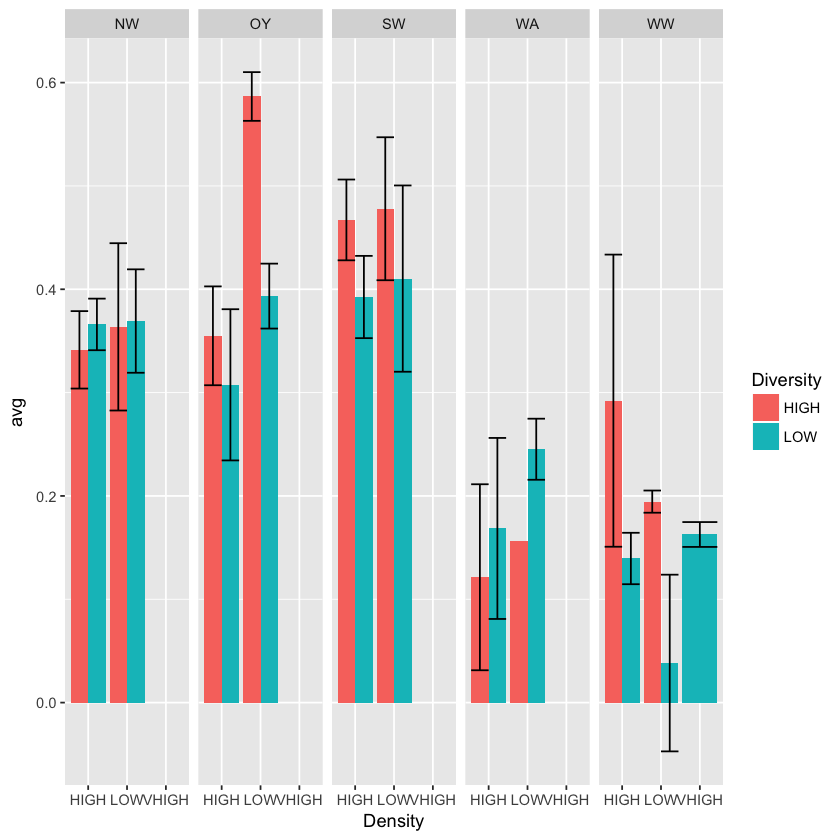

In [34]:
Dryweight=aggregate(Dry_weight~Density+Diversity+Site, data=cv, FUN=multi)
Dryweight$avg=Dryweight$Dry_weight[,1]
Dryweight$sd=Dryweight$Dry_weight[,2]
Dryweight=Dryweight[-4]
ggplot(Dryweight, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [132]:
#ggplot(cv, aes(x = Density, y = Dry_weight, fill=Diversity)) + geom_boxplot() + facet_grid( ~Site)

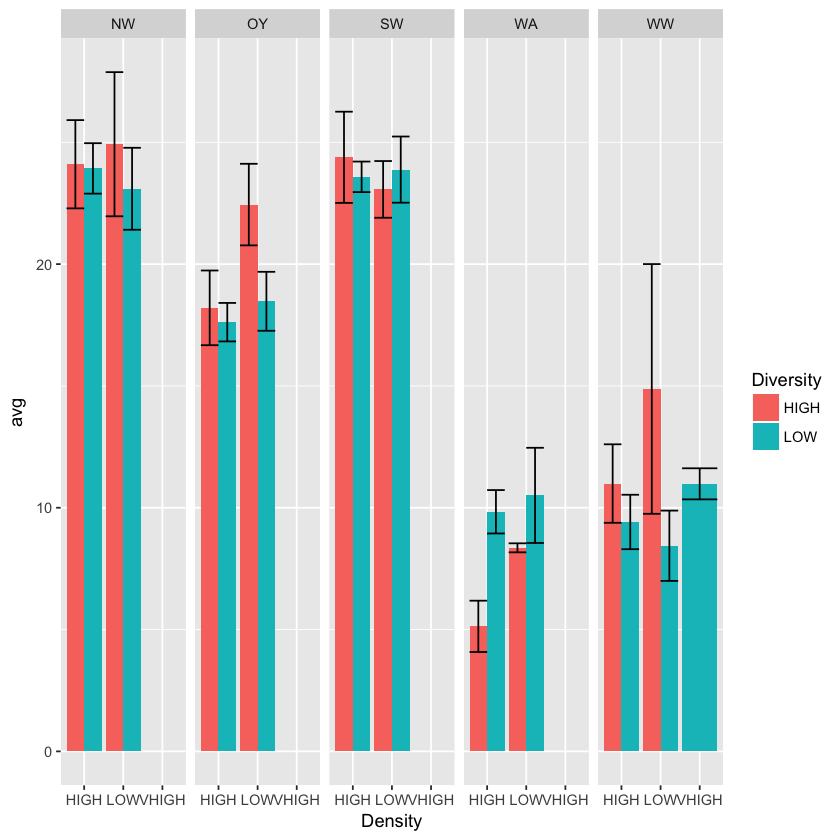

In [35]:
Weightpost=aggregate(Weight_post~Density+Diversity+Site, data=cv, FUN=multi)
Weightpost$avg=Weightpost$Weight_post[,1]
Weightpost$sd=Weightpost$Weight_post[,2]
Weightpost=Weightpost[-4]
ggplot(Weightpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [133]:
#ggplot(cv, aes(x = Density, y = Weight_post, fill=Diversity)) +geom_boxplot() + facet_grid( ~Site)

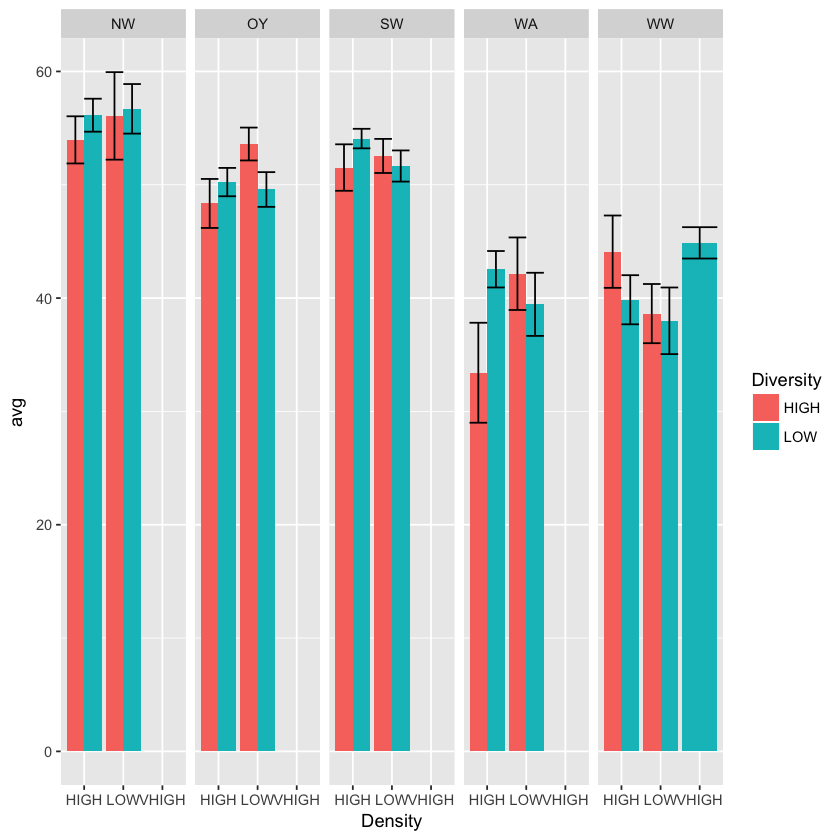

In [36]:
Lengthpost=aggregate(Length_post~Density+Diversity+Site, data=cv, FUN=multi)
Lengthpost$avg=Lengthpost$Length_post[,1]
Lengthpost$sd=Lengthpost$Length_post[,2]
Lengthpost=Lengthpost[-4]
ggplot(Lengthpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [137]:
#ggplot(cv, aes(x = Density, y = Length_post, fill=Diversity)) +geom_boxplot() + facet_grid( ~Site)

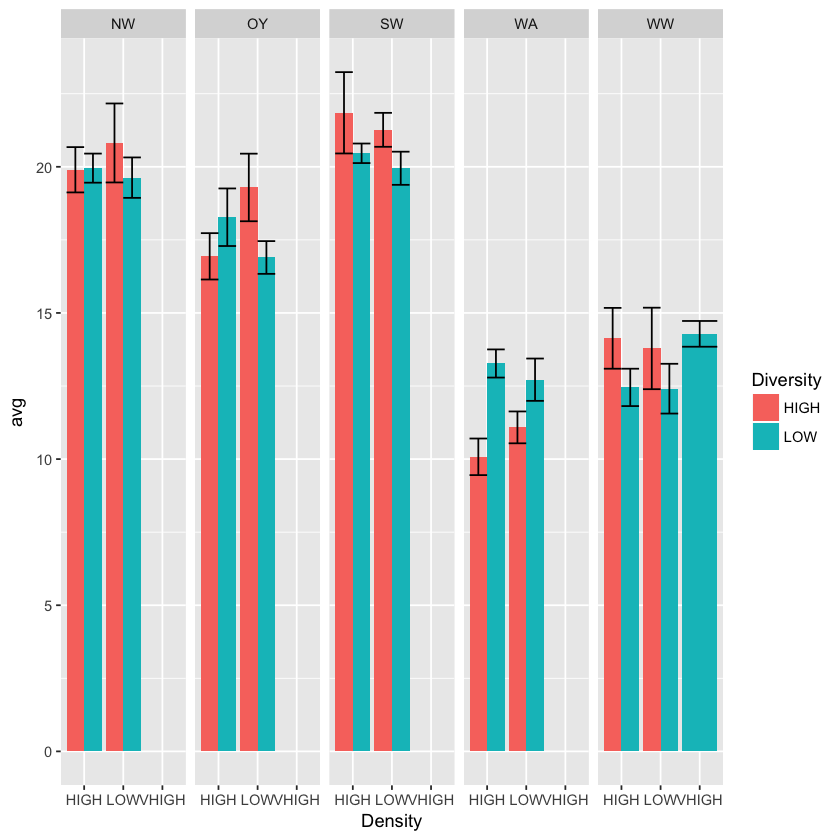

In [37]:
Heightpost=aggregate(Height_post~Density+Diversity+Site, data=cv, FUN=multi)
Heightpost$avg=Heightpost$Height_post[,1]
Heightpost$sd=Heightpost$Height_post[,2]
Heightpost=Heightpost[-4]
ggplot(Heightpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [139]:
#ggplot(cv, aes(x = Density, y = Height_post, fill=Diversity)) +       geom_boxplot() + facet_grid( ~Site)

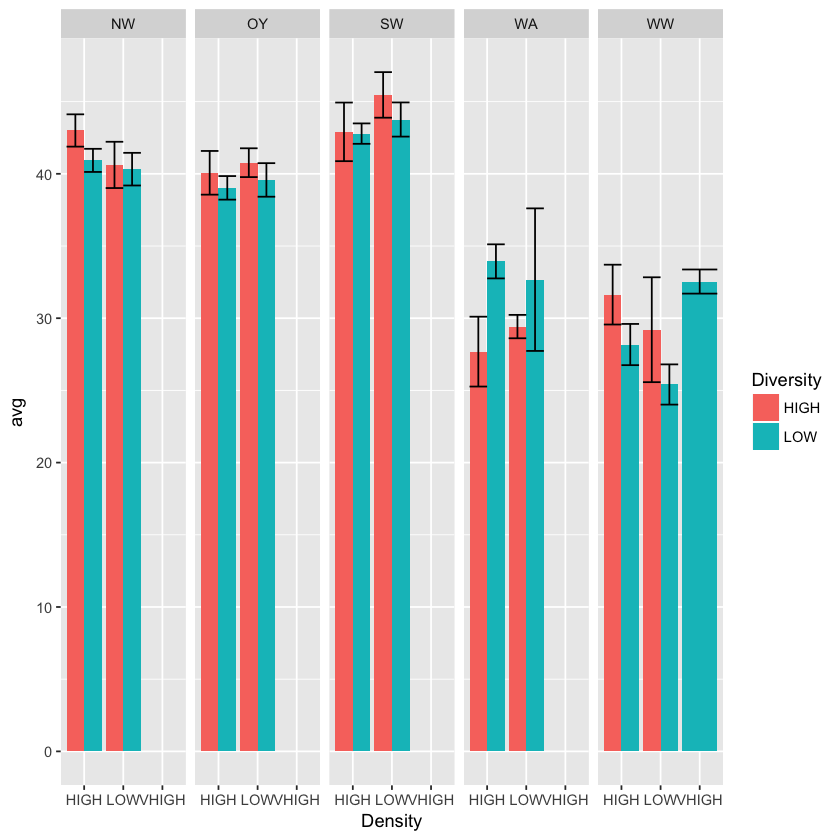

In [38]:
Widthpost=aggregate(Width_post~Density+Diversity+Site, data=cv, FUN=multi)
Widthpost$avg=Widthpost$Width_post[,1]
Widthpost$sd=Widthpost$Width_post[,2]
Widthpost=Widthpost[-4]
ggplot(Widthpost, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

From Malick and Breitburg 2016

Prevalence was calculated as the percentage of individuals
with infections out of the total number sampled,
and mean intensity as the average intensity
including individuals infected with P. marinus (i.e.
Mackin scores of 0.5 to 5; Soniat et al. 2006). 

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

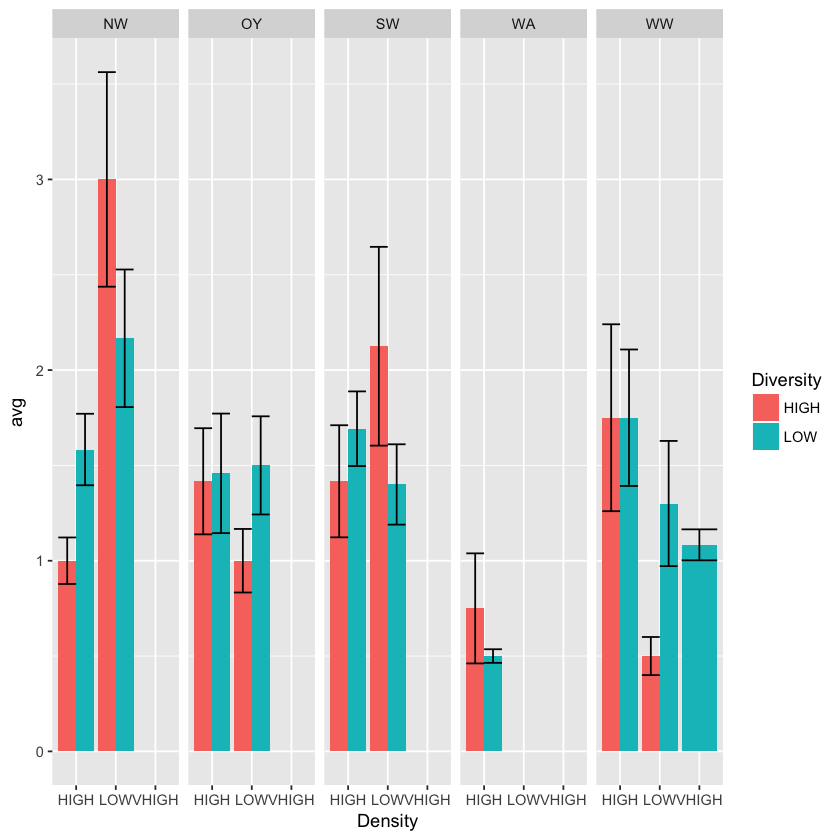

In [39]:
intensity=aggregate(RFTM_score~Density+Diversity+Site, data=cv, FUN=multi.int)
intensity$avg=intensity$RFTM_score[,1]
intensity$sd=intensity$RFTM_score[,2]
intensity=intensity[-4]
ggplot(intensity, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [40]:
prevalence=with(cv, tapply(RFTM_score, list( Density, Diversity, Site, Color),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))

In [15]:
colnames(cv)

[1] "Date_pre"         "Date_post"        "Site"             "Density"         
 [5] "Diversity"        "Color"            "Number"           "Species"         
 [9] "Length_pre"       "Width_pre"        "Height_pre"       "Weight_pre"      
[13] "Notes_pre"        "POST_DEAD_ALIVE"  "Length_post"      "Width_post"      
[17] "Height_post"      "Weight_post"      "Genetics_Weight"  "Dry_Weight_plate"
[21] "Dry_weight_final" "Dry_weight_shell" "RFTM_date"        "RFTM_score"      
[25] "peacrabs"         "Notes_post"       "LiveMM"           "Height_change"   
[29] "Weight_change"    "Length_change"    "Width_change"     "Dry_weight"

In [41]:
prevalence=as.data.frame.table(prevalence, response=RFTM_score)

In [42]:
colnames(prevalence)=c("Density", "Diversity", "Site", "Color", "RFTM_score")

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

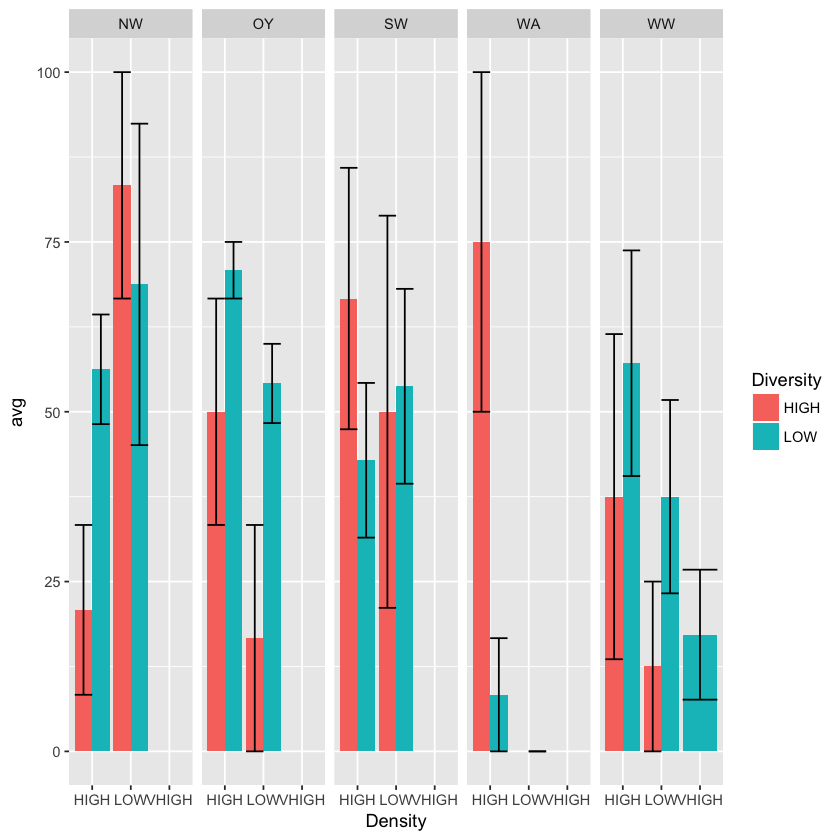

In [43]:
prevalence=aggregate(RFTM_score~Density+Diversity+Site, data=prevalence, FUN=multi)
prevalence$avg=prevalence$RFTM_score[,1]
prevalence$sd=prevalence$RFTM_score[,2]
prevalence=prevalence[-4]
ggplot(prevalence, aes(x = Density, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

Warning message:
“Removed 9 rows containing missing values (geom_bar).”

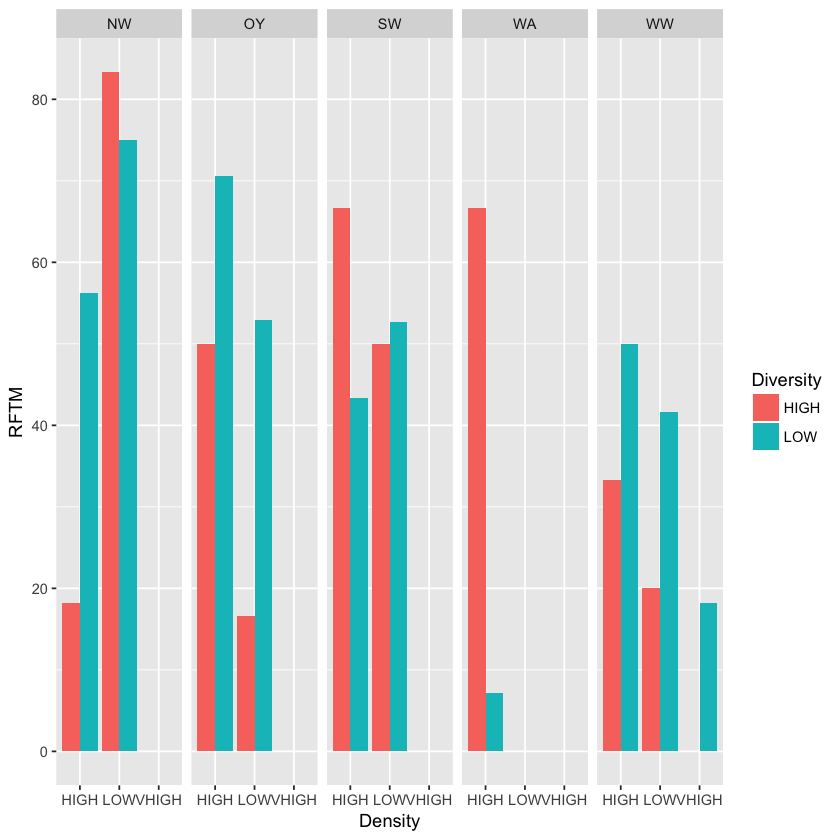

In [128]:
ggplot(prevalence, aes(x = Density, y = RFTM, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)

In [107]:
clams=with(cv, tapply(cv$LiveMM, list( Density, Diversity, Site),  mean, na.rm=TRUE))

In [109]:
clams=as.data.frame.table(clams, response=LiveMM)

In [110]:
colnames(clams)=c("Density", "Diversity", "Site", "Clams")

Warning message:
“Removed 9 rows containing missing values (geom_bar).”

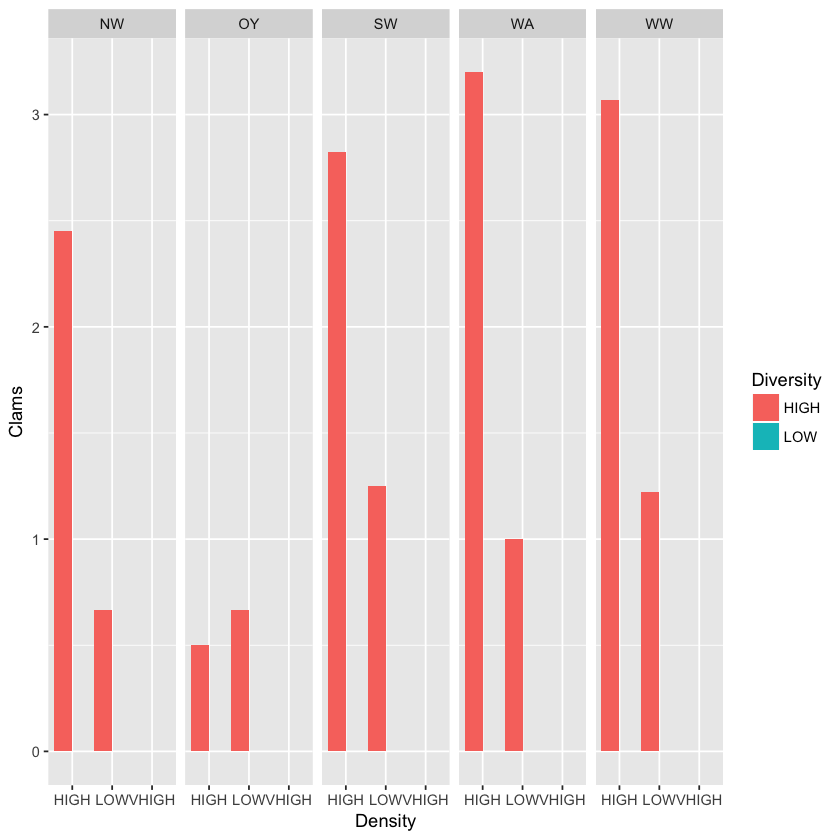

In [111]:
ggplot(clams, aes(x = Density, y = Clams, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)

In [ ]:
High diversity, number of clams, intensity and prevalence. 

In [146]:
cvh=cv[cv$Diversity=="HIGH",]

In [149]:
clams_prevalence=with(cvh, tapply(RFTM_score, list( LiveMM, Density, Site),  function(x) sum(x>0, na.rm=TRUE)/sum(!is.na(x))))

In [150]:
clams_prevalence=as.data.frame.table(clams_prevalence)
colnames(clams_prevalence)=c("Clams", "Density", "Site", "RFTM")

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Removed 66 rows containing missing values (geom_point).”

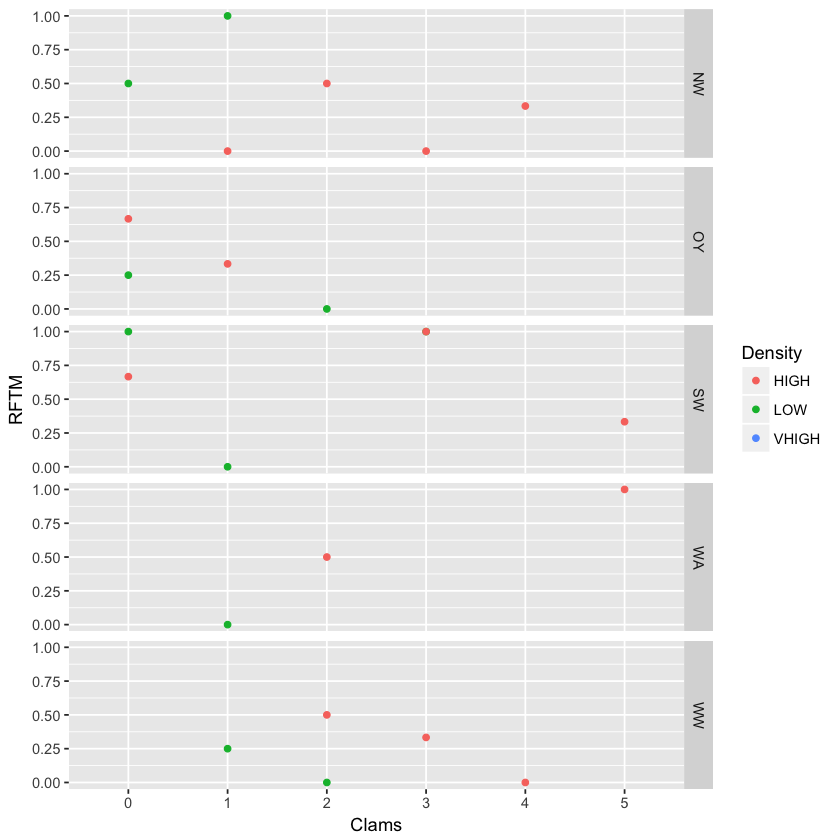

In [152]:
ggplot(clams_prevalence, aes(x = Clams, y = RFTM, colour=Density)) +
        geom_point(stat="identity", position="dodge")+facet_grid(Site~.)

In [153]:
clams_intensity=with(cvh, tapply(RFTM_score, list( LiveMM, Density,  Site),  function(x) mean(x[x!=0], na.rm=TRUE)))

In [154]:
clams_intensity=as.data.frame.table(clams_intensity)
colnames(clams_intensity)=c("Clams", "Density", "Site", "RFTM")

Warning message:
“Removed 5 rows containing missing values (geom_bar).”Warning message:
“Removed 6 rows containing missing values (geom_errorbar).”

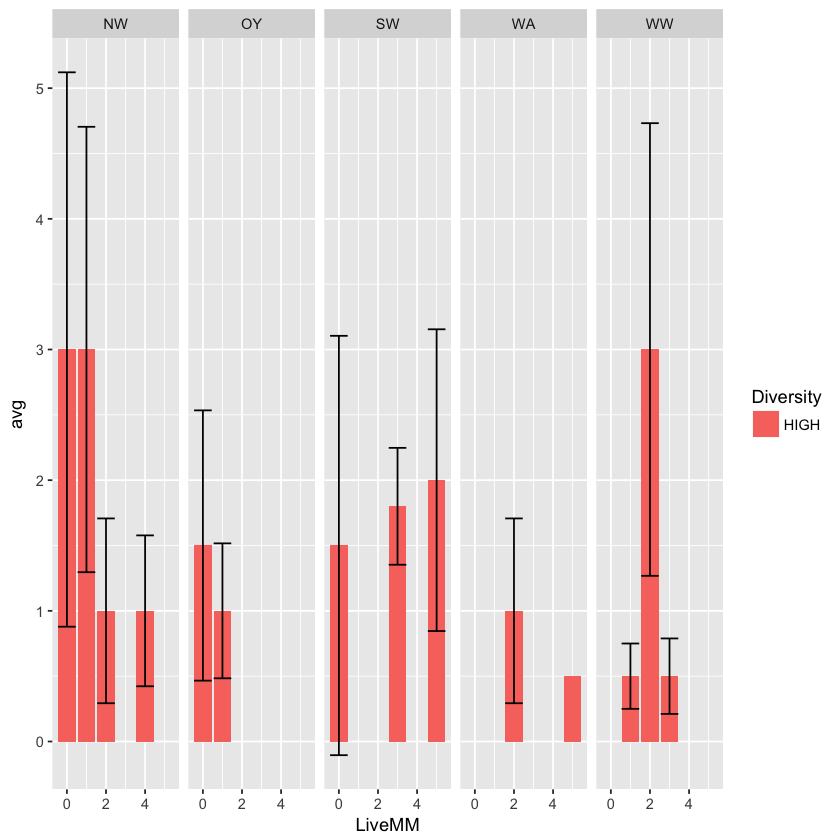

In [147]:
clams_intensity=aggregate(RFTM_score~LiveMM+Diversity+Site, data=cvh, FUN=multi.int)
clams_intensity$avg=clams_intensity$RFTM_score[,1]
clams_intensity$sd=clams_intensity$RFTM_score[,2]
clams_intensity=clams_intensity[-4]
ggplot(clams_intensity, aes(x = LiveMM, y = avg, fill=Diversity)) +
        geom_bar(stat="identity", position="dodge")+facet_grid(~Site)+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") 

In [144]:
print(clams_intensity)

   LiveMM Diversity Site      avg        sd
1       0      HIGH   NW 3.000000 2.1213203
2       1      HIGH   NW 3.000000 1.7043362
3       2      HIGH   NW 1.000000 0.7071068
4       3      HIGH   NW      NaN 0.0000000
5       4      HIGH   NW 1.000000 0.5773503
6       0       LOW   NW 1.816667 1.2365858
7       0      HIGH   OY 1.500000 1.0341395
8       1      HIGH   OY 1.000000 0.5163978
9       2      HIGH   OY      NaN 0.0000000
10      0       LOW   OY 1.476190 1.1707974
11      0      HIGH   SW 1.500000 1.6046807
12      1      HIGH   SW      NaN 0.0000000
13      3      HIGH   SW 1.800000 0.4472136
14      5      HIGH   SW 2.000000 1.1547005
15      0       LOW   SW 1.565217 1.0057234
16      1      HIGH   WA      NaN        NA
17      2      HIGH   WA 1.000000 0.7071068
18      5      HIGH   WA 0.500000        NA
19      0       LOW   WA 0.500000 0.1178511
20      1      HIGH   WW 0.500000 0.2500000
21      2      HIGH   WW 3.000000 1.7320508
22      3      HIGH   WW 0.50000

Warning message:
“Removed 73 rows containing missing values (geom_point).”

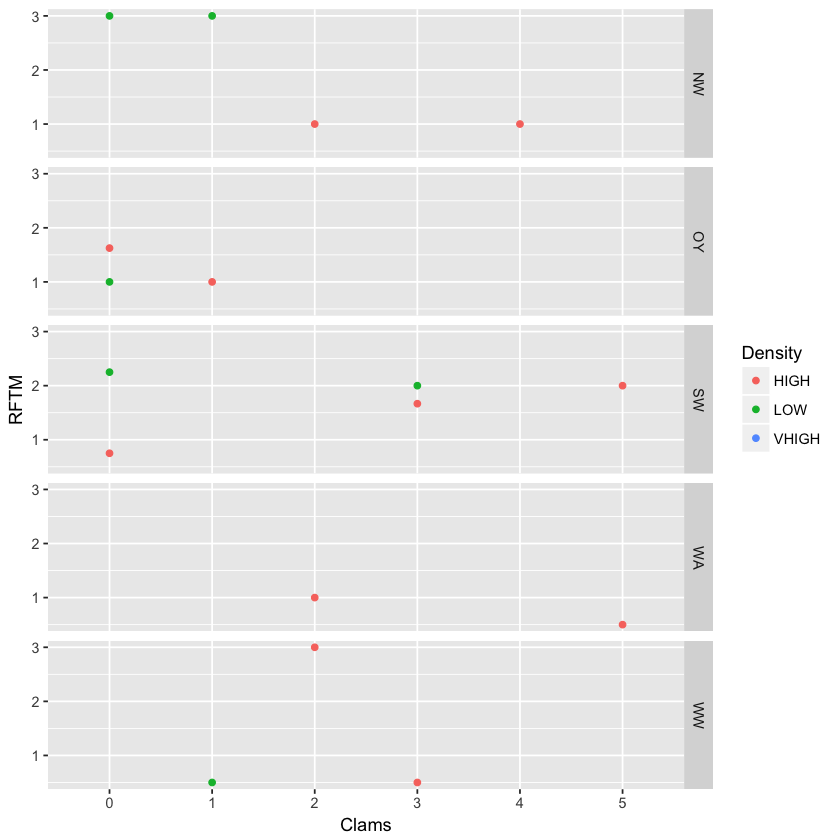

In [156]:
ggplot(clams_intensity, aes(x = Clams, y = RFTM, colour=Density)) +
        geom_point()+facet_grid(Site~.)

Effect of infection on size/weight?